# XGBoost

XGBoost , GBm'in hız ve tahmin performansını artıtrmak üzere optimize edilmiş; ölçeklenebilir ve  farklı platformlara entegre edilebilir halidir.

- ölçeklenebilir 
- hızlıdır.
- tahmin başarısı yüksektir

In [1]:
# kütüphaneler

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Veri setinin yüklenmesi
df = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\machine learning\Doğrusal Olmayan Regresyon Modelleri\KNN ALgoritması\Hitters.csv")
df = df.dropna()  


dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])


y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
!pip install xgboost

In [5]:
import xgboost
from xgboost import XGBRegressor

In [6]:
xgb=XGBRegressor().fit(X_train,y_train)

In [7]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
y_pred=xgb.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

366.3863437634965

In [10]:
xgb_params={"learning_rate":[0.1,0.01,0.5],
           "max_depth":[2,3,4,5,8],
           "n_estimators":[100,200,500,1000],
           "colsample_bytree":[0.4,0.7,1]}

In [11]:
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [12]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 100}

In [13]:
xgb_tuned=XGBRegressor(colsample_bytre=0.4,
                      learning_rate=0.5,
                      max_depth=3,
                      n_estimators=100).fit(X_train,y_train)

In [14]:
y_pred=xgb_tuned.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test,y_pred))

366.1301368207096

In [16]:
#  değişken önem düzeyi

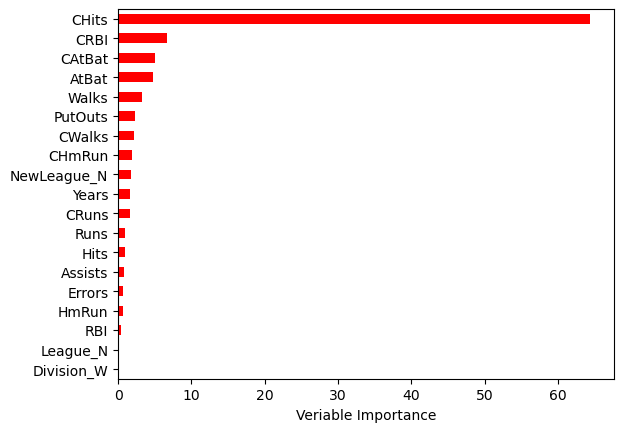

In [17]:
Importance=pd.DataFrame({"Importance":xgb_tuned.feature_importances_*100},
                       index=X_train.columns)

Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r")

plt.xlabel("Veriable Importance")
plt.gca().legend_=None